## MNIST dataset (Classification Problem)

In [1]:
#Downloading Dataset from sklearn Library
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X= mnist['data']    #dataset or independent columns
y= mnist['target']   #Taget column

In [7]:
X.shape

(70000, 784)

It contails 70000 rowas and 784 features.

This features are nothing but it is information about each pixcel of the image.

ImageSize(28*28)

In [8]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
y.shape

(70000,)

In [42]:
#Try to visualize a picture using Matplotlib library
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

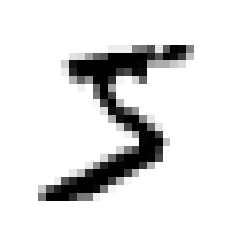

In [54]:
digit_1= np.array(X.iloc[0])
digit_1_image= digit_1.reshape(28,28)

plt.imshow(digit_1_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [55]:
y.iloc[0]

'5'

We can clearly have a look here on image and its corruspoing o/p.

In [58]:
y.dtype.is_dtype('int')

False

O/p veriable is not is int format so lets convert it into the int format

In [59]:
y= y.astype(np.uint8)

In [62]:
y.dtype

dtype('uint8')

Before inspecting the data lets create training and testing datasets so that we should not touch testing dataset.

In [63]:
X_train, X_test, y_train, y_test= X[:60000], X[60000:], y[:60000], y[60000:]

#### lets create binary classifire first which will detect the number 5 or not-5

In [66]:
y_train_5= (y_train == 5)  # will give true where the value is equal to 5
y_test_5= (y_test == 5)

We will train our model with Stochastic gradient descent classifire.

This algorithm is very good in handling large dataset.

In [67]:
from sklearn.linear_model import SGDClassifier

In [70]:
sgd_class = SGDClassifier(random_state=42)

In [71]:
sgd_class.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [73]:
sgd_class.predict([digit_1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

It has gussed correctly

In [74]:
#lets calculate the accuray
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_class, X_train, y_train_5, cv=4, scoring='accuracy')

array([0.95766667, 0.9664    , 0.96513333, 0.95366667])

Model is giving very good accuracy but if we observed we have to c how many times value 5 is repeting in the dataset.It will be very less abount of time arount 10%.

It means the data set is skewed datatset. so accuracy is not a nood measure to look at so we will use confusion matrix.

In [75]:
#We will first collect the prediction data per instance
from sklearn.model_selection import cross_val_predict
y_train_5_predict= cross_val_predict(sgd_class, X_train, y_train_5, cv= 3)

In [76]:
#Create the confution matrix for y_train_5 and y_train_predict
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_5_predict)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Here we can false positive and false negative values are very high hence precision wise the model is not good.

In [77]:
#Just for understanding
y_train_perfect_predictions= y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [82]:
#calculate Precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_5_predict)
#model is 83% correct only

0.8370879772350012

In [83]:
recall_score(y_train_5, y_train_5_predict)
#It has only detected 65% of correct values

0.6511713705958311

In [84]:
#Best method to relate precision and recall togather is finding F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_5_predict)

0.7325171197343846

#### lets find our presicion recall curve to decide threshold

In [88]:
y_scores= cross_val_predict(sgd_class,X_train, y_train_5, cv=3, method="decision_function")

In [89]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [114]:
def plot_precision_recall_curve(p, r, t):
    plt.plot(t, p[:-1], "g--", label="Precision")
    
    plt.plot(t, r[:-1]),"g-",label="recall")
   

SyntaxError: cannot assign to function call (Temp/ipykernel_3036/2438395630.py, line 4)

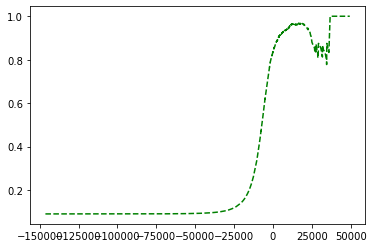

In [112]:
plot_precision_recall_curve(precision, recall, threshold)
plt.show()

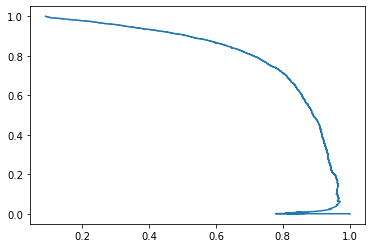

In [115]:
plt.plot(precision, recall)

In [118]:
#method to select the threshold which gives 90% precision
threshold_90= threshold[np.argmax(precision>= 0.90)]
threshold_90

3370.0194991439557

In [119]:
y_train_pred_90= (y_scores>= threshold_90)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [120]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [121]:
#By using random forest classifire we will calculate ROC AUC curve
from sklearn.ensemble import RandomForestClassifier
rand_class= RandomForestClassifier(random_state=42)
y_probabilities= cross_val_predict(rand_class, X_train, y_train_5, cv=3, method="predict_proba")

sgdclassifire has decision function method likewise randomforest and predict_proba() method to compute confusion matrics

In [124]:
y_forest_score= y_probabilities[:,1]


In [125]:
from sklearn.metrics import roc_curve
frp_forest, trp_forest, threshlod_forest= roc_curve(y_train_5, y_forest_score)

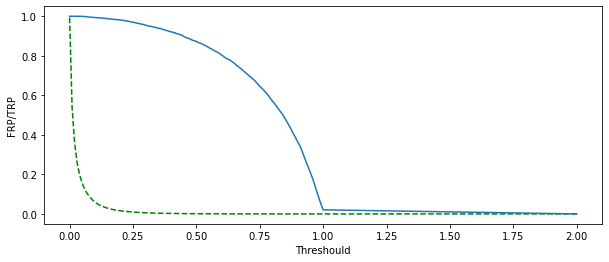

In [133]:
plt.figure(figsize=(10,4))
plt.plot(threshlod_forest, frp_forest,'g--', label='FRP')
plt.plot(threshlod_forest, trp_forest, label="TRP")
plt.xlabel("Threshould")
plt.ylabel("FRP/TRP")
plt.show()

In [131]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_forest_score)

0.9983436731328145

In [134]:
# Now in a similar way we will tain our model for complete dataset (Multi Class Classification)
rand_class.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [136]:
rand_class.predict([digit_1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [137]:
rand_class.predict_proba([digit_1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

90% preobaility for 5

In [138]:
#Check with cross validation
cross_val_score(rand_class,X_train, y_train, cv=3, scoring='accuracy')

array([0.9646 , 0.96255, 0.9666 ])

In [141]:
#Try with standerdizing the dataset
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
X_train_scaled= std.fit_transform(X_train)
cross_val_score(rand_class, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.96445, 0.96255, 0.96645])

not much changes in the output 

In [143]:
#lets try to plot confusion matrix
y_multi_pred= cross_val_predict(rand_class, X_train_scaled, y_train, cv=3, method='predict_proba')

array([0.02, 0.  , 0.  , ..., 0.  , 0.02, 0.01])

## Multilabel Classifire

We will evaluate our model by using multi label classifire KneighborClassifire.

In [151]:
#Create 2 classes 
import numpy as np
y_train_large= (y_train >= 7)
y_train_odd= (y_train % 2 == 1)

y_train_multilabel= np.c_[y_train_large, y_train_odd]

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train_multilabel)

KNeighborsClassifier()

In [153]:
knn.predict([digit_1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

It will always give 2 values as we have created two labels

In [154]:
#predict the F1 score for knn classifire
y_knn_predict= cross_val_predict(knn, X_train, y_train_multilabel, cv=3)

In [156]:
f1_score(y_train_multilabel, y_knn_predict, average='macro')

0.976410265560605

In [157]:
f1_score(y_train_multilabel, y_knn_predict, average='weighted')

0.9778357403921755